In [1]:
# %pip install pandas
# %pip install matplotlib
# %pip install seaborn
# %pip install plotly
# %pip install jinja2
# %pip install nbformat
# %pip install bar_chart_race

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import bar_chart_race as bcr
import warnings
warnings.filterwarnings("ignore")

In [3]:
ev_df = pd.read_csv("dataset.csv")
ev_df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,JTMEB3FV6N,Monroe,Key West,FL,33040,2022,TOYOTA,RAV4 PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,42,0,NaN,198968248,POINT (-81.80023 24.5545),NaN,12087972100
1,1G1RD6E45D,Clark,Laughlin,NV,89029,2013,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,38,0,NaN,5204412,POINT (-114.57245 35.16815),NaN,32003005702
2,JN1AZ0CP8B,Yakima,Yakima,WA,98901,2011,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,73,0,15.0,218972519,POINT (-120.50721 46.60448),PACIFICORP,53077001602
3,1G1FW6S08H,Skagit,Concrete,WA,98237,2017,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,39.0,186750406,POINT (-121.7515 48.53892),PUGET SOUND ENERGY INC,53057951101
4,3FA6P0SU1K,Snohomish,Everett,WA,98201,2019,FORD,FUSION,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,26,0,38.0,2006714,POINT (-122.20596 47.97659),PUGET SOUND ENERGY INC,53061041500


In [4]:
ev_df.shape

(112634, 17)

In [5]:
ev_df.columns

Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility', '2020 Census Tract'],
      dtype='object')

# Lets look at the meaning of columns:

1. **VIN (1-10)** - the 1st 10 characters of each vehicle's Vehicle Identification Number (VIN).

2. **County** - this is the geographic region of a state that a vehicles owner is listed to reside within. Vehicles registered in Washington state may be  located in other states.

3. **City** - the city in which the registered owner resides.

4. **State** - this is the geographic region of the country associated with the record. These addresses may be located in other states.

5. **Postal Code** - the 5 digit zip code in which the registered owner resides.

6. **Model Year** - the model year of the vehicle, determined by decoding the Vehicle Identification Number (VIN).

7. **Make** - the manufacturer of the vehicle, determined by decoding the Vehicle Identification Number (VIN).

8. **Model** - the model of the vehicle, determined by decoding the Vehicle Identification Number (VIN).

9. **Electric Vehicle Type** - this distinguishes the vehicle as all electric or a plug-in hybrid.

10. **Clean Alternative Fuel Vehicle (CAFV) Eligibility** - this categorizes vehicle as Clean Alternative Fuel Vehicles (CAFVs) based on the fuel requirement and electric-only range requirement in House Bill 2042 as passed in the 2019 legislative session.

11. **Electric Range** - describes how far a vehicle can travel purely on its electric charge.

12. **Base MSRP** - this is the lowest Manufacturer s Suggested Retail Price (MSRP) for any trim level of the model in question.

13. **Legislative District** - the specific section of Washington State that the vehicles owner resides in, as represented in the state legislature.

14. **DOL Vehicle ID** - unique number assigned to each vehicle by Department of Licensing for identification purposes.

15. **Vehicle Location** - the center of the ZIP Code for the registered vehicle.

16. **Electric Utility** - this is the electric power retail service territories serving the address of the registered vehicle. All ownership types for areas in Washington are included: federal, investor owned, municipal, political subdivision, and cooperative.

17. **2020 Census Tract** - the census tract identifier is a combination of the state, county, and census tract codes as assigned by the United States Census Bureau in the 2020 census, also known as Geographic Identifier (GEOID).                                                                                  

In [6]:
ev_df = ev_df.rename(columns={'County':'Country','Postal Code': 'PostalCode', 'Model Year': 'ModelYear','Electric Vehicle Type': 'Electric_Vehicle_Type',
'Clean Alternative Fuel Vehicle (CAFV) Eligibility':'CAFV_Eligibility','Electric Range':'Electric_Range', 'Base MSRP':'Base_MSRP', 'Legislative District':'Legislative_District',
'DOL Vehicle ID': 'DOL_Vehicle_ID','Vehicle Location':'Vehicle_Location','Electric Utility':'Electric_Utility','2020 Census Tract':'2020_Census_Tract','VIN (1-10)':'VIN'})

In [7]:
cols = ev_df.columns
def unique_values():
    for i in np.arange(0,len(cols)):
        print('There are {} no of unique values in {} column out of {}'.format(ev_df[cols[i]].nunique(), cols[i], len(ev_df)))
unique_values()

There are 7548 no of unique values in VIN column out of 112634
There are 165 no of unique values in Country column out of 112634
There are 629 no of unique values in City column out of 112634
There are 45 no of unique values in State column out of 112634
There are 773 no of unique values in PostalCode column out of 112634
There are 20 no of unique values in ModelYear column out of 112634
There are 34 no of unique values in Make column out of 112634
There are 114 no of unique values in Model column out of 112634
There are 2 no of unique values in Electric_Vehicle_Type column out of 112634
There are 3 no of unique values in CAFV_Eligibility column out of 112634
There are 101 no of unique values in Electric_Range column out of 112634
There are 30 no of unique values in Base_MSRP column out of 112634
There are 49 no of unique values in Legislative_District column out of 112634
There are 112634 no of unique values in DOL_Vehicle_ID column out of 112634
There are 758 no of unique values in V

In [8]:
ev_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112634 entries, 0 to 112633
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VIN                    112634 non-null  object 
 1   Country                112634 non-null  object 
 2   City                   112634 non-null  object 
 3   State                  112634 non-null  object 
 4   PostalCode             112634 non-null  int64  
 5   ModelYear              112634 non-null  int64  
 6   Make                   112634 non-null  object 
 7   Model                  112614 non-null  object 
 8   Electric_Vehicle_Type  112634 non-null  object 
 9   CAFV_Eligibility       112634 non-null  object 
 10  Electric_Range         112634 non-null  int64  
 11  Base_MSRP              112634 non-null  int64  
 12  Legislative_District   112348 non-null  float64
 13  DOL_Vehicle_ID         112634 non-null  int64  
 14  Vehicle_Location       112610 non-nu

In [9]:
ev_df.isnull().sum().sort_values(ascending = False)

Electric_Utility         443
Legislative_District     286
Vehicle_Location          24
Model                     20
VIN                        0
PostalCode                 0
Country                    0
State                      0
City                       0
Electric_Vehicle_Type      0
Make                       0
ModelYear                  0
CAFV_Eligibility           0
Base_MSRP                  0
Electric_Range             0
DOL_Vehicle_ID             0
2020_Census_Tract          0
dtype: int64

In [10]:
ev_df.dropna(inplace = True)
ev_df.isnull().sum().sort_values(ascending = False)

VIN                      0
Country                  0
City                     0
State                    0
PostalCode               0
ModelYear                0
Make                     0
Model                    0
Electric_Vehicle_Type    0
CAFV_Eligibility         0
Electric_Range           0
Base_MSRP                0
Legislative_District     0
DOL_Vehicle_ID           0
Vehicle_Location         0
Electric_Utility         0
2020_Census_Tract        0
dtype: int64

In [11]:
ev_df.describe().style.background_gradient(cmap='Blues')

,PostalCode,ModelYear,Electric_Range,Base_MSRP,Legislative_District,DOL_Vehicle_ID,2020_Census_Tract
count,112152.000000,112152.000000,112152.000000,112152.000000,112152.000000,112152.000000,112152.000000
mean,98258.856659,2019.004494,87.829651,1793.882320,29.817703,199471226.925619,53039581729.097191
std,302.889935,2.891859,102.336645,10785.259118,14.698726,94018421.758270,16177880.746795
min,98001.000000,1997.000000,0.000000,0.000000,1.000000,4777.000000,53001950100.000000
25%,98052.000000,2017.000000,0.000000,0.000000,18.000000,148416439.000000,53033008700.000000
50%,98121.000000,2020.000000,32.000000,0.000000,34.000000,192391604.500000,53033029307.000000
75%,98370.000000,2022.000000,208.000000,0.000000,43.000000,219188518.000000,53053072506.000000
max,99403.000000,2023.000000,337.000000,845000.000000,49.000000,479254772.000000,53077940007.000000


# Univariate Analysis

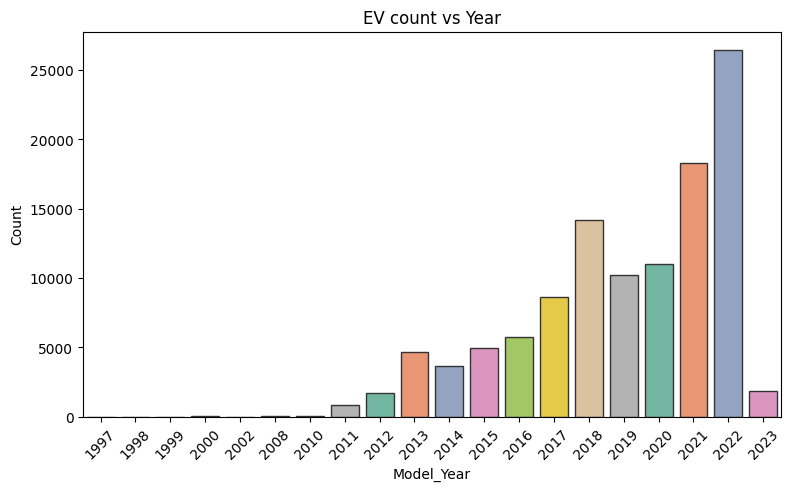

In [12]:
Year = ev_df.groupby('ModelYear').count().sort_values(by='City',ascending=False)['City'].index
values = ev_df.groupby('ModelYear').count().sort_values(by='City',ascending=False)['City'].values

plt.figure(figsize=(9,5))
sns.barplot(x=list(Year),y=values,edgecolor='.2',palette='Set2')
plt.xticks(rotation=45)
plt.title("EV count vs Year")
plt.xlabel('Model_Year')
plt.ylabel('Count')
plt.show()

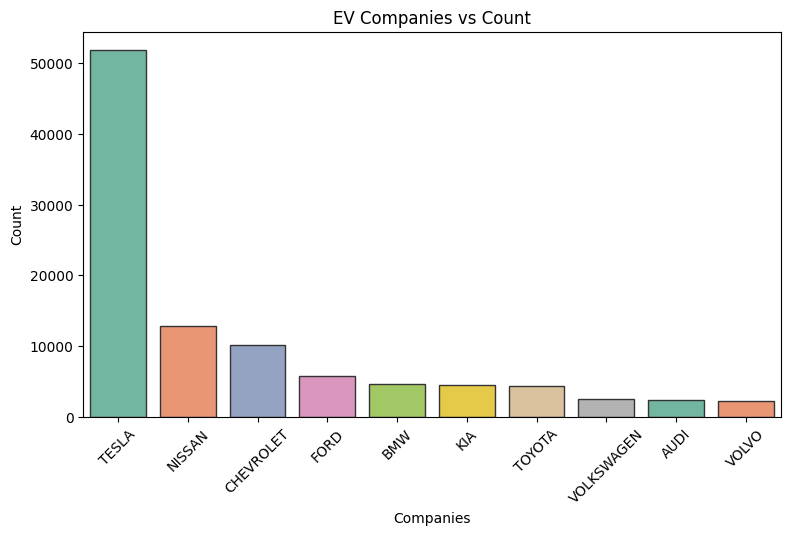

In [13]:
Companies = ev_df.groupby('Make').count().sort_values(by='City',ascending=False)['City'].index
values = ev_df.groupby('Make').count().sort_values(by='City',ascending=False)['City'].values


plt.figure(figsize=(9,5))
sns.barplot(x=list(Companies)[:10],y=values[:10],edgecolor='.2',palette='Set2')
plt.xticks(rotation=45)
plt.title("EV Companies vs Count")
plt.xlabel('Companies')
plt.ylabel('Count')
plt.show()

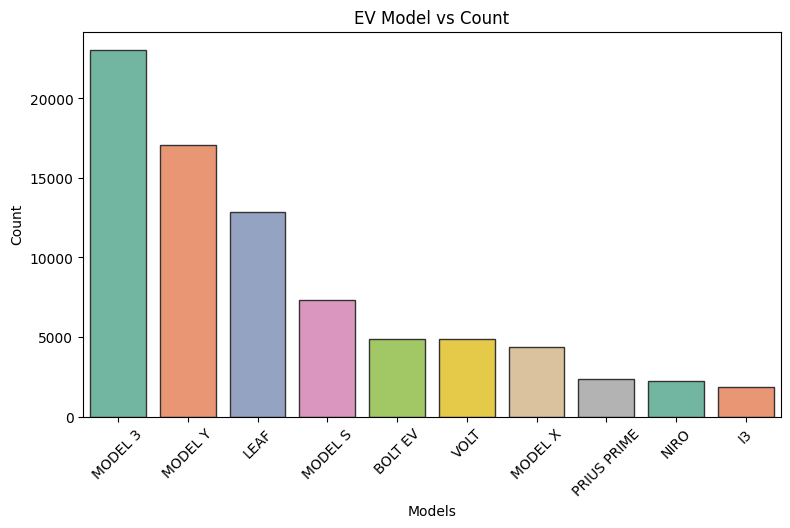

In [14]:
Models = ev_df.groupby('Model').count().sort_values(by='City',ascending=False)['City'].index
values = ev_df.groupby('Model').count().sort_values(by='City',ascending=False)['City'].values


plt.figure(figsize=(9,5))
sns.barplot(x=list(Models)[:10],y=values[:10],edgecolor='.2',palette='Set2')
plt.xticks(rotation=45)
plt.title("EV Model vs Count")
plt.xlabel('Models')
plt.ylabel('Count')
plt.show()

In [15]:
px.pie(names=list(Companies)[:10],values=values[:10],title='Top 10 EV companies',width=500,height=400)

<Axes: xlabel='Electric_Vehicle_Type', ylabel='count'>

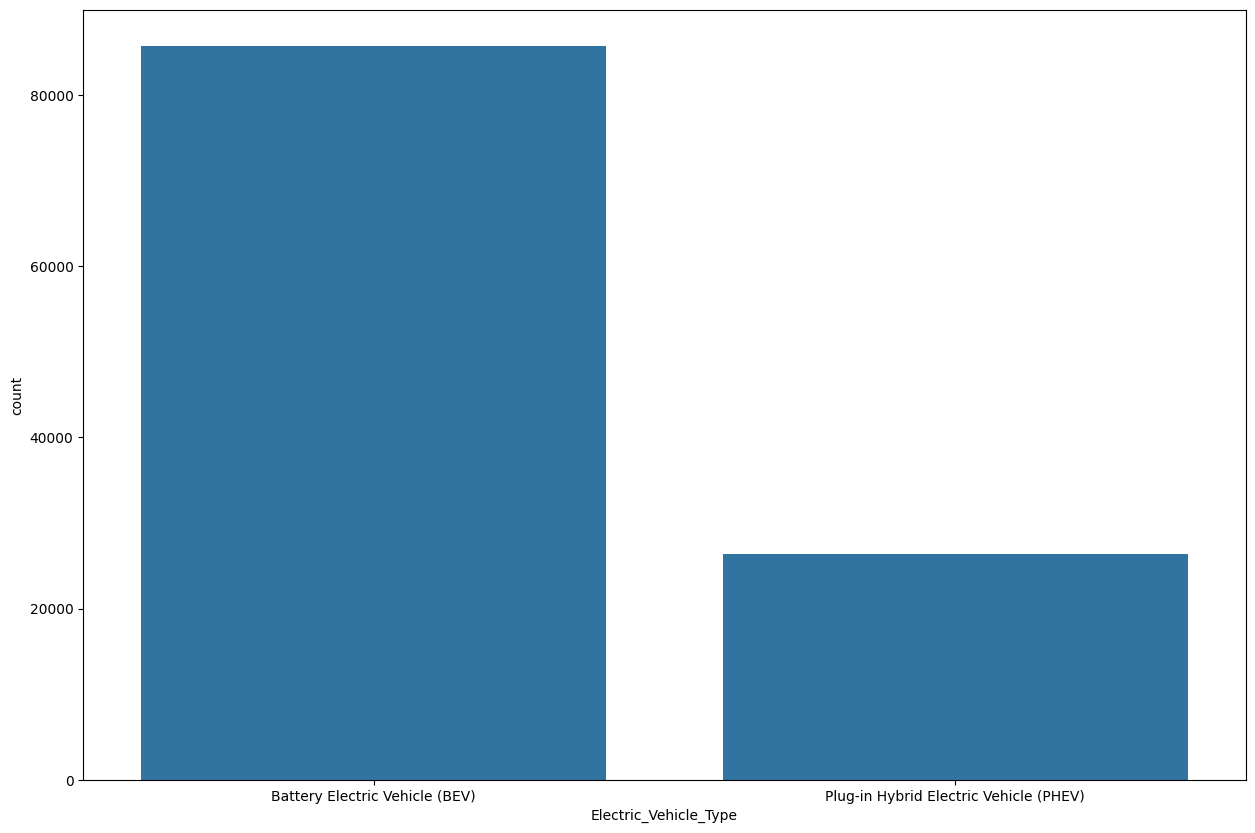

In [16]:
plt.figure(figsize=(15, 10))
sns.countplot(data=ev_df, x='Electric_Vehicle_Type')

In [17]:
Vehicle_type = list(ev_df.groupby('Electric_Vehicle_Type').count()['Country'].index)
values = ev_df.groupby('Electric_Vehicle_Type').count()['Country'].values
px.pie(names=Vehicle_type,values=values,title="Electric_Vehicle_Type",width=500,height=400)

In [18]:
top_10_companies = list(Companies)[:10]
for i in top_10_companies:
    data = ev_df[ev_df['Make']==i]
    data = data.groupby('Model').count().sort_values(by='City',ascending=False).index
    print('Top selling model for',i,'is ----------->',data[0])

Top selling model for TESLA is -----------> MODEL 3
Top selling model for NISSAN is -----------> LEAF
Top selling model for CHEVROLET is -----------> BOLT EV
Top selling model for FORD is -----------> FUSION
Top selling model for BMW is -----------> I3
Top selling model for KIA is -----------> NIRO
Top selling model for TOYOTA is -----------> PRIUS PRIME
Top selling model for VOLKSWAGEN is -----------> ID.4
Top selling model for AUDI is -----------> E-TRON
Top selling model for VOLVO is -----------> XC90


In [19]:
for index,i in enumerate(top_10_companies):
    data = ev_df[ev_df['Make']==i]
    labels = list(data.groupby('Electric_Vehicle_Type').count()['City'].index)
    values = list(data.groupby('Electric_Vehicle_Type').count()['City'].values)
    fig = px.pie(names=labels,values=values,width=700,height=400,title=str(i))
    fig.show()

<Axes: title={'center': 'Top 10 EV count vs Year'}, xlabel='ModelYear', ylabel='count'>

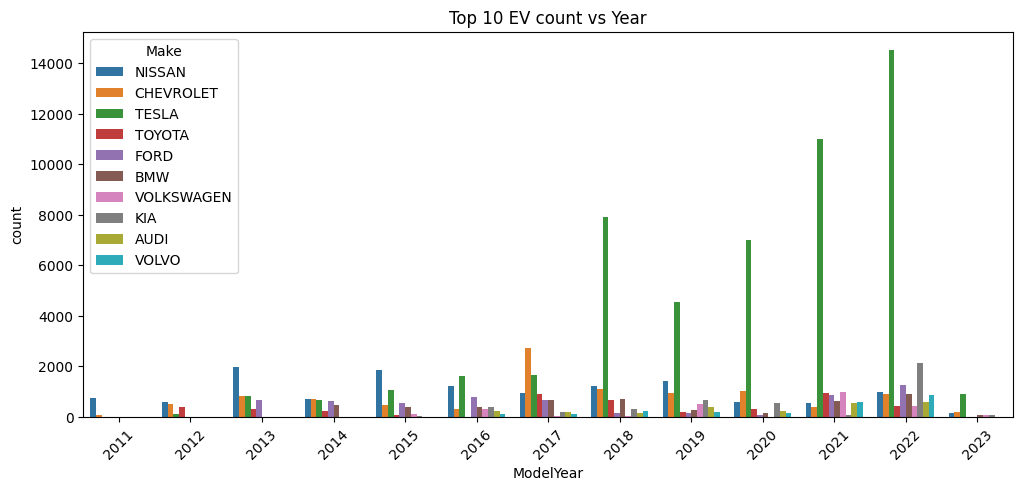

In [20]:
data = ev_df.copy()
data['top_10'] = data['Make'].apply(lambda x:1 if x in top_10_companies else 0)
data = data[data['top_10']==1]
data = data[data['ModelYear']>=2011]
plt.figure(figsize=(12,5))
plt.title("Top 10 EV count vs Year")
plt.xticks(rotation=45)
sns.countplot(x = 'ModelYear',hue='Make',data=data)

In [21]:
km_range = pd.DataFrame(ev_df.groupby('Make')['Electric_Range'].mean().reset_index()).sort_values(by='Electric_Range',ascending=False).reset_index(drop=True).head(10)
km_range.columns = ['model','km_range']
px.pie(data_frame=km_range, names='model', values='km_range',hover_name='km_range',title='Top 10 Model with KM range',hole=True,width=500,height=400)

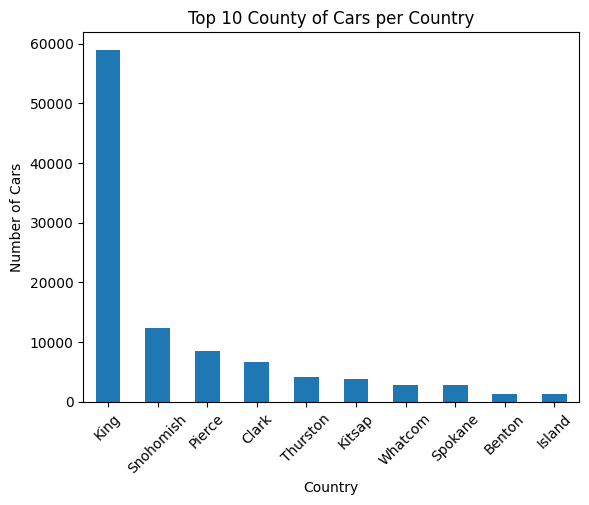

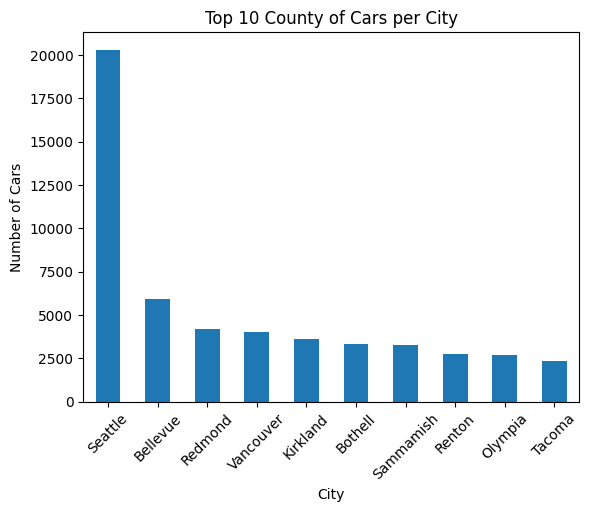

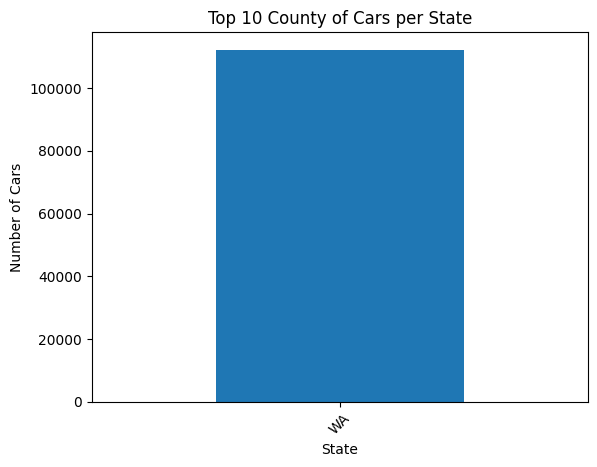

In [22]:
def top_10(column_name):
    car_counts = ev_df[column_name].value_counts().nlargest(10)
    # plot the counts
    car_counts.plot(kind='bar')
    plt.xlabel(f'{column_name}')
    plt.xticks(rotation=45)
    plt.ylabel('Number of Cars')
    plt.title(f'Top 10 County of Cars per {column_name}')
    plt.show()
    
columns = ['Country','City','State']
for column_name in columns:
    top_10(column_name)

In [23]:
year_wise_cars = ev_df.groupby('ModelYear')['VIN'].count().reset_index()
year_wise_cars.columns = ['year','num_cars']
fig = px.line(year_wise_cars,x="year", y="num_cars", title='Year Wise Number of Cars',markers=True)
fig.show()

year_wise_cars.sort_values(by='num_cars', ascending=False).head(10)

,year,num_cars
18,2022,26455
17,2021,18277
14,2018,14190
16,2020,10998
15,2019,10216
13,2017,8598
12,2016,5709
11,2015,4918
9,2013,4669
10,2014,3665


# Bi-variate Analysis

[Text(0.5, 1.0, 'Tesla year wise count'),
 Text(0.5, 0, 'Year'),
 Text(0, 0.5, 'Count')]

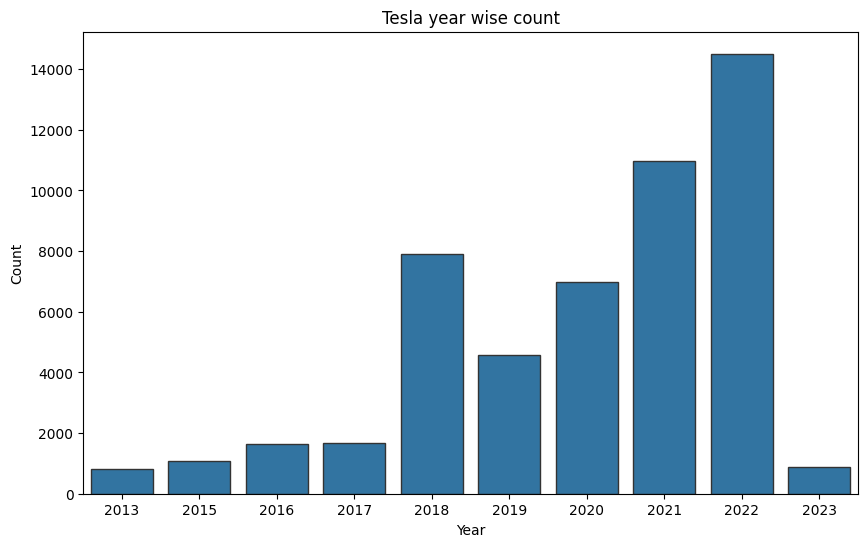

In [24]:
data_TESLA = ev_df[ev_df['Make']=='TESLA']
top_10_states_TESLA = list(data_TESLA.groupby('State').count().sort_values(by='City',ascending=False)['City'].index)[:10]
values = list(data_TESLA.groupby('State').count().sort_values(by='City',ascending=False)['City'].values)[:10]
plt.figure(figsize=(10,6))

top_10_year_TESLA = list(data_TESLA.groupby('ModelYear').count().sort_values(by='City',ascending=False)['City'].index)[:10]
values = list(data_TESLA.groupby('ModelYear').count().sort_values(by='City',ascending=False)['City'].values)[:10]
sns.barplot(x = top_10_year_TESLA,y=values,edgecolor='.2').set(title='Tesla year wise count', xlabel='Year', ylabel='Count')

Text(0.5, 1.0, 'Top 10 highest maximum Models')

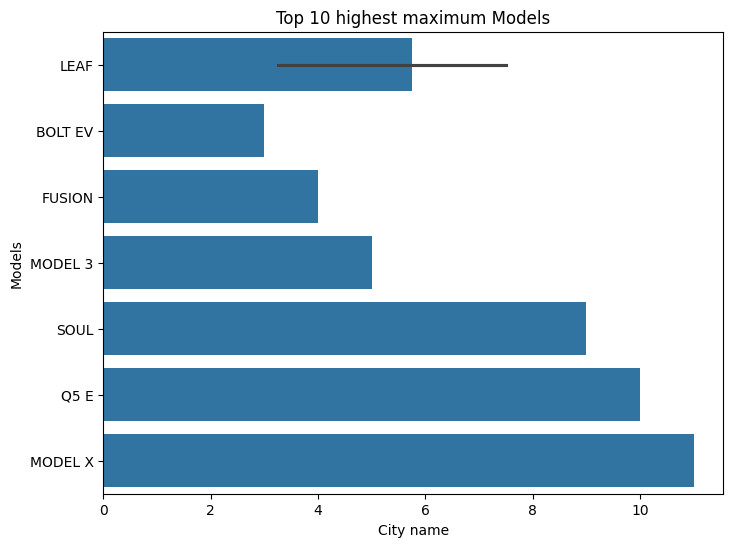

In [25]:
#  ploting the top models
plt.figure(figsize=(8,6))
# plt.xticks(rotation=75)
sns.barplot(y=ev_df['Model'].head(10),x=ev_df['Model'].head(10).index)
plt.xlabel( "City name")

# Set label for y-axis
plt.ylabel( "Models" )

# Set title for figure
plt.title( "Top 10 highest maximum Models" )

<Axes: xlabel='Electric_Range', ylabel='Count'>

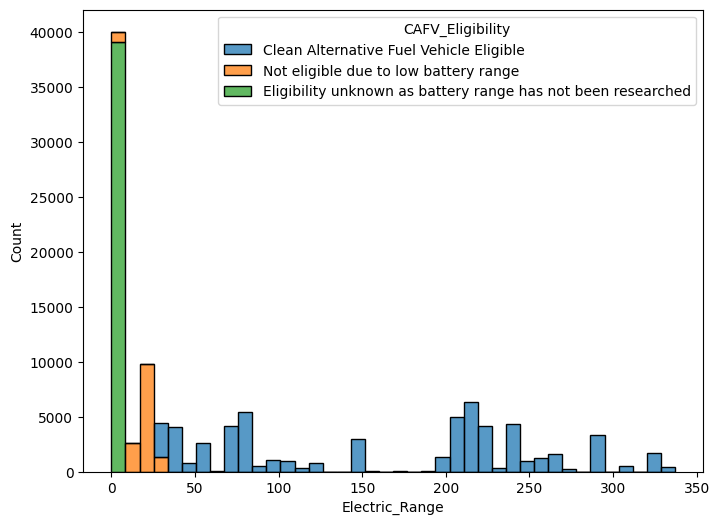

In [26]:
plt.figure(figsize=(8,6))
sns.histplot(data=ev_df, x="Electric_Range", hue="CAFV_Eligibility", multiple="stack")

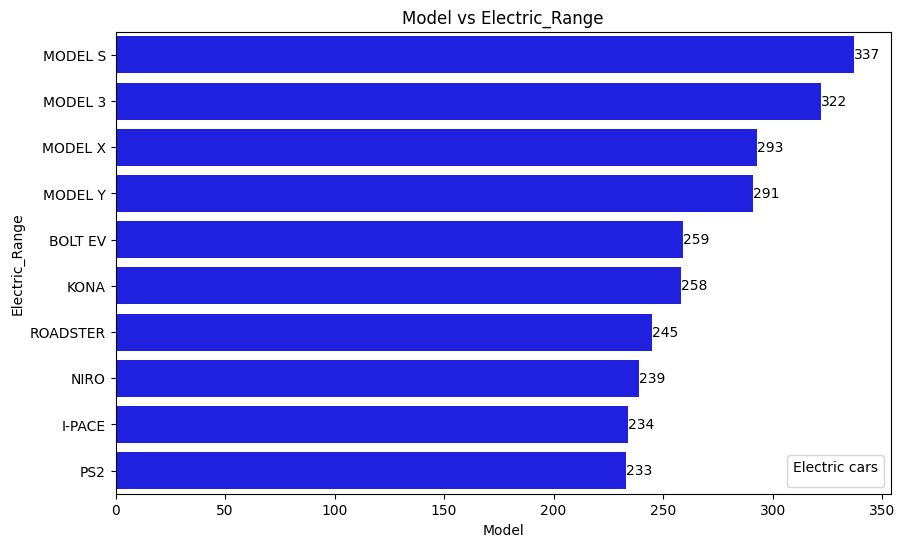

In [27]:
def TOP_10_max_viz(colum_x, colum_y):
    values_count = ev_df.groupby(colum_x)[colum_y].max().to_frame().reset_index()
    # take the top 10 values based on the colum_y
    top_values_count = values_count.nlargest(10, colum_y)
    plt.figure(figsize=(10, 6))
    barplot = sns.barplot(data=top_values_count, x=colum_y, y=colum_x, color='b', )
    plt.title(f'{colum_x} vs {colum_y}')
    plt.xlabel(colum_x)
    plt.ylabel(colum_y)
    plt.legend(title='Electric cars')
    for i in barplot.containers:
        barplot.bar_label(i,)
    plt.show()
TOP_10_max_viz('Model', 'Electric_Range')

# Task 2 method 1

In [28]:
ev_counts = ev_df['Country'].value_counts().reset_index()
ev_counts.columns = ['Country', 'Count']
# print(ev_counts)
# Create the choropleth map
fig = px.choropleth(
    ev_counts,
    geojson= px.data.election_geojson(),
    locations='Country',
    # locationmode='',  # Change to 'geojson' if using more detailed geo data
    color='Count',
    scope='usa',
    title='Number of Electric Vehicles by County',
    color_continuous_scale=px.colors.sequential.Plasma,
)

# Show the figure
fig.show()

In [29]:
ev_df = ev_df.sort_values(['ModelYear'])
ev_df['ModelYear'] = ev_df['ModelYear'].astype('str')

# Task 2 method 2

In [30]:
ev_count_by_pincode = ev_df.groupby(['PostalCode', 'ModelYear', 'State']).size().reset_index(name='No_of_EVs')

state_wise = ev_count_by_pincode[ev_count_by_pincode['State'] == 'WA']


fig = px.choropleth_mapbox(state_wise,
                           geojson="https://raw.githubusercontent.com/OpenDataDE/State-zip-code-GeoJSON/master/wa_washington_zip_codes_geo.min.json",
                           locations='PostalCode',
                           color='No_of_EVs',
                           featureidkey="properties.ZCTA5CE10",  
                           mapbox_style="carto-positron",
                           zoom=2,  # Adjust zoom level
                           center={"lat": 47.7511, "lon": -120.7401}, 
                           title="No.of EVs in the Washington City from (1997-2023)",
                           animation_frame="ModelYear",  
                           color_continuous_scale="Cividis",
                           hover_data=['No_of_EVs']  
                          )


fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
# Show the animated map
fig.show()

# Task 3 method 1

In [31]:
df = ev_df.groupby(['Make', 'ModelYear']).size().reset_index(name='Number_of_Vehicles')

fig = px.bar(df,
             y='Make',
             x='Number_of_Vehicles',
             animation_frame='ModelYear',
             orientation='h',
             title='EV count over years (2011-23)',
             labels={'Number_of_Vehicles': 'EV count'},
             range_x=[0, 3000],
             color='Make', 
             color_discrete_map={
                 'Tesla': 'orange',
                 'Toyota': 'yellow',
                 'Ford': 'black',
             }
             )

# Find the year with the highest number of vehicles
high_year = df['ModelYear'].max()

# Check if the year exists and add the annotation
if (df['ModelYear'] == high_year).any():
    make_2023 = df.loc[df['ModelYear'] == high_year, 'Make'].iloc[0]
    fig.add_annotation(x=2500, y=make_2023,
                       text=f"Max EVs in the Year {2022}",
                       showarrow=True,
                       font_size=10)
else:
    print("Year not found in data")

# Customize the layout
fig.update_layout(
    xaxis=dict(showgrid=True, gridcolor='white'),
    yaxis_title='EV Compannies',
    xaxis_title='EVs Count ',
    showlegend=False,
    title_x=0.5,
    title_font=dict(size=30),
    margin=dict(l=50, r=50, t=50, b=50),
    width=800,
    height=600
)

# Customize trace appearance
fig.update_traces(texttemplate='%{x}',
                  textposition='outside',
                  textfont_size=10)

# Show the plot
fig.show()

# Task 3 method 2

In [32]:
# Pivot the dataframe
pivot_df = df.pivot_table(index='ModelYear', columns='Make', values='Number_of_Vehicles', fill_value=0)

# Reset the index to have 'ModelYear' as a column
pivot_df.reset_index(inplace=True)

# Rename the first column to 'Year'
pivot_df.rename(columns={'ModelYear': 'Year'}, inplace=True)

# Set 'Year' as the index
pivot_df.set_index('Year', inplace=True)

# Ensure all data types are numeric
pivot_df = pivot_df.apply(pd.to_numeric)

# Create the racing bar plot with adjustments
bcr.bar_chart_race(
    df=pivot_df,
    filename=None,
    # filename="My_animation.mp4",
    orientation='h',
    sort='desc',
    n_bars=30,
    tick_label_size=7,
    steps_per_period=1,
    period_length=1500,
    filter_column_colors=True  # Reduce color repetition
)
